<a href="https://colab.research.google.com/github/serinss/seSAC_ML_DL_Class/blob/main/03_3_%ED%8A%B9%EC%84%B1_%EA%B3%B5%ED%95%99%EA%B3%BC_%EA%B7%9C%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#다중 회귀(multiple regression)
하나의 특성(feature)을 사용 -> 선형 회귀 모델  
여러 개의 특성을 사용 -> 다중 회귀 모델  

단항, 다항 = degree  
단순, 다중 = feature 의 개수


하나의 feature = axis(축)  
서로 다른 변수 길이, 높이, 두께를 가지고 무게를 예측

- 특성 공학(feature engineering)  
길이, 높이, 두께, 길이X높이 <<--새로운 특성을 만들어내는 작업  
ex. 길이**2

#데이터 준비

In [1]:
%run my_init.py

Mounted at /content/drive


In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [4]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [6]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

#사이킷런의 변환기(Transformer)
1. fit()  
2. transform()

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [28]:
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [29]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input) # 기존 feature 3개
train_poly = poly.transform(train_input) # 알아서 교차항을 만들게 할 수 있음
print(train_poly.shape)

(42, 9)


In [30]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   length   56 non-null     float64
 1    height  56 non-null     float64
 2    width   56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB


In [32]:
test_poly = poly.transform(test_input)
print(test_poly.shape)

(14, 9)


#다중 회귀 모델 훈련하기

1 -> 2 -> 9개

In [33]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [34]:
# print(lr.score(test_poly, test_target))
r2_score(test_target, lr.predict(test_poly))

# 둘 다 적절하게 성능이 우수해졌다!

0.9714559911594134

In [35]:
poly = PolynomialFeatures(degree=5, include_bias=False) # degree=5 로 설정!

# poly.fit(train_input)
# train_poly = poly.transform(train_input)
train_poly = poly.fit_transform(train_input) #위 과정을 한꺼번에

test_poly = poly.transform(test_input)
print(train_poly.shape) # 항이 55개(feature : 1->2->9->55 로 늘어남)

(42, 55)


In [36]:
#이 경우는 overfit 된 형태 -> 데이터에 비해 feature가 너무 많다

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991097


In [37]:
print(lr.score(test_poly, test_target))

-144.40579242684848


###Q. degree가 1~5 중 overfit 혹은 underfit 문제가 해소되는 다중회귀 모델을 만드십시오. (다중+다항 회귀 모델)

A. 두 개 다 점수가 높고, 훈련 점수가 테스트 점수보다 높은 모델을 찾아야 함  

In [ ]:
for d in range(1,6):
  poly = PolynomialFeatures(degree=d, include_bias=False)
  train_poly = poly.fit_transform(train_input)
  test_poly = poly.transform(test_input)

  lr.fit(train_poly, train_target)
  train_score = r2_score(train_target, lr.predict(train_poly))
  test_score = r2_score(test_target, lr.predict(test_poly))

  print(f"degree = {d} & feature = {train_poly.shape[1]}")
  print(f"  -> train {train_score} ")
  print(f"     test  {test_score}\n")

degree = 1 & feature = 3  
  -> train 0.9559326821885706   
     test  0.8796419177546367  

degree = 2 & feature = 9  
  -> train 0.9903183436982124   
     test  0.9714559911594134  

degree = 3 & feature = 19  
  -> train 0.99638723409801 -> 학습 성능은 계속 올라가는 중   
     test  0.9410534492233222  

degree = 4 & feature = 34  
  -> train 0.9995286898074609   
     test  -6.7866969165723585 -> 점수 꺾임  

degree = 5 & feature = 55  
  -> train 0.9999999999991097   
     test  -144.40579242684848  

feature가 커 질수록 model complexity 증가 -> train 학습 점수 증가  
하지만, 어느 지점부터 test 시험 점수는 꺾이는 지점 생성

-> fit, transform 등등의 머신러닝 알고리즘은 이미 개발되어 있는 것  
이것을 활용하여 어떤 솔루션을 해결하고, 서비스를 개발할 것인지를 생각해야 함

#규제(regularization)
머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 하는 것  
즉, 모델이 훈련 세트에 과대적합되지 않도록 만드는 것  


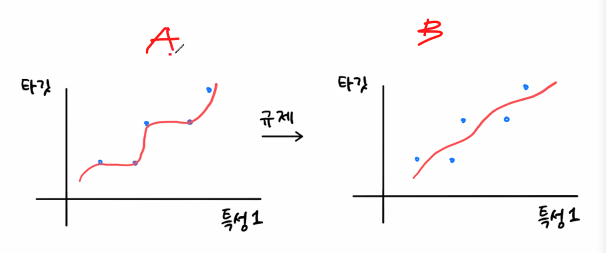

B가 더 좋은 모델 ->  일반화 성능이 높다  
A는 overfitted model(과적합된 학습 모델)  
새로운 값을 넣었을 때, 오차가 매우 심할 것